In [1]:
import pandas as pd
iris_data = pd.read_csv("Iris.csv")
print(iris_data)

      Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
0      1            5.1           3.5            1.4           0.2   
1      2            4.9           3.0            1.4           0.2   
2      3            4.7           3.2            1.3           0.2   
3      4            4.6           3.1            1.5           0.2   
4      5            5.0           3.6            1.4           0.2   
..   ...            ...           ...            ...           ...   
145  146            6.7           3.0            5.2           2.3   
146  147            6.3           2.5            5.0           1.9   
147  148            6.5           3.0            5.2           2.0   
148  149            6.2           3.4            5.4           2.3   
149  150            5.9           3.0            5.1           1.8   

            Species  
0       Iris-setosa  
1       Iris-setosa  
2       Iris-setosa  
3       Iris-setosa  
4       Iris-setosa  
..              ...  
145  

In [2]:
iris_data = iris_data.loc[(iris_data["Species"] == "Iris-setosa") | (iris_data["Species"] == "Iris-versicolor") ]
iris_data["Species"] = iris_data["Species"].map({"Iris-setosa": 0, "Iris-versicolor": 1})
print(iris_data)

     Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  Species
0     1            5.1           3.5            1.4           0.2        0
1     2            4.9           3.0            1.4           0.2        0
2     3            4.7           3.2            1.3           0.2        0
3     4            4.6           3.1            1.5           0.2        0
4     5            5.0           3.6            1.4           0.2        0
..  ...            ...           ...            ...           ...      ...
95   96            5.7           3.0            4.2           1.2        1
96   97            5.7           2.9            4.2           1.3        1
97   98            6.2           2.9            4.3           1.3        1
98   99            5.1           2.5            3.0           1.1        1
99  100            5.7           2.8            4.1           1.3        1

[100 rows x 6 columns]


In [3]:
iris_data["Id"] = iris_data["Id"].apply(lambda x: 1)
iris_data.rename(columns={"Id": "Bias"}, inplace="True")
print(iris_data)

    Bias  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  Species
0      1            5.1           3.5            1.4           0.2        0
1      1            4.9           3.0            1.4           0.2        0
2      1            4.7           3.2            1.3           0.2        0
3      1            4.6           3.1            1.5           0.2        0
4      1            5.0           3.6            1.4           0.2        0
..   ...            ...           ...            ...           ...      ...
95     1            5.7           3.0            4.2           1.2        1
96     1            5.7           2.9            4.2           1.3        1
97     1            6.2           2.9            4.3           1.3        1
98     1            5.1           2.5            3.0           1.1        1
99     1            5.7           2.8            4.1           1.3        1

[100 rows x 6 columns]


In [4]:
from sklearn.model_selection import train_test_split
X = iris_data.drop("Species", axis=1)
y = iris_data["Species"]
print(X.shape, y.shape)

(100, 5) (100,)


In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
X_train = X_train.to_numpy()
y_train = y_train.to_numpy()
X_test = X_test.to_numpy()
y_test = y_test.to_numpy()
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(67, 5) (33, 5) (67,) (33,)


In [6]:
import numpy as np
w = np.random.rand(X_train.shape[1])
print(w)

[0.34120877 0.66295893 0.07948926 0.32810174 0.60038522]


In [7]:
def sigmoid(x):
  return 1/(1 + np.exp(-x))

In [8]:
converged = False
# for i in range(1, 20000):
epochs = 0
while not converged:
    epochs += 1
    converged = True
    for data in zip(X_train, y_train):
        result = sigmoid(np.dot(w, data[0]))
        yhat = 0
        if result >= 0.5:
          yhat = 1
        if data[1] != yhat:
          converged = False
          gradient = (data[1] - sigmoid(np.dot(w, data[0])))*data[0]
          w = w + 0.01*gradient
print("Weights are", w)
print("Number of epochs", epochs)

Weights are [ 0.21491359  0.03033302 -0.34610196  0.14375115  0.5687954 ]
Number of epochs 2


In [9]:
correct = 0
for data in zip(X_test, y_test):
    result = sigmoid(np.dot(w, data[0]))
    yhat = 0
    if result >= 0.5:
        yhat = 1
    if data[1] == yhat:
        correct += 1

accuracy = (correct/y_test.shape[0])*100
print("Accuracy based on training set is", accuracy, "%")

Accuracy based on training set is 100.0 %


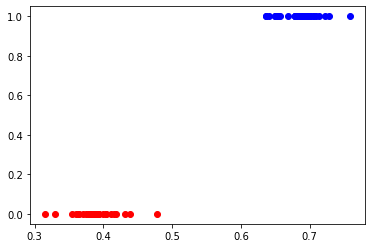

In [17]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
for X, y in zip(X_train, y_train):
    if y == 0:
        ax.plot(sigmoid(np.dot(w, X)), y, 'ro')
    if y == 1:
        ax.plot(sigmoid(np.dot(w, X)), y, 'bo')